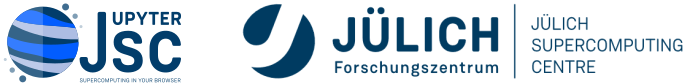
<!--<h5 style="text-align: right">Author: <a href="mailto:@fz-juelich.de?subject=Jupyter-JSC%20documentation"></a></h5>--><h5 style="text-align: right">Author: Katharina Höflich</h5>  
<h5><a href="../index.ipynb">Index</a></h5>
<h1 style="text-align: center">Install containerized Jupyter kernel at Jupyter-JSC</h1>  

This Jupyter notebook will walk you through the installation of a containerized Jupyter kernel (for use at Jupyter-JSC, but it should actually work with any Jupyter server on a system where Singularity is installed). Considerable performance improvements (especially with respect to kernel start-up times) over e.g. conda-based Jupyter kernels on distributed filesystems, as are typically installed on HPC systems, might be experienced. In the example below, the `base-notebook` from the [Jupyter docker stacks](https://jupyter-docker-stacks.readthedocs.io/en/latest/) is used as an IPython kernel (already having the required `ipykernel` package installed), the approach presented here might be extended to any other [Jupyter kernel compatible programming language](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels), though.

Requirements:

* Python environment with an installed `ipykernel` package in a Docker (or Singularity) container
* `container` group access for the JSC systems as described [here](https://apps.fz-juelich.de/jsc/hps/juwels/container-runtime.html#getting-access) in the docs

Check that the Singularity container runtime is available via the JupyterLab environment,

In [1]:
singularity --version

singularity version 3.6.4-1.el8


Specify the filesystem location that stores the Singularity container image,

In [2]:
IMAGE_TARGET_DIR=/p/project/cesmtst/hoeflich1/jupyter-base-notebook

Optional, if you already have a Singularity container image available at the above location: Convert a containerized Python environment (e.g. the Jupyter `base-notebook` that is [available via Dockerhub](https://hub.docker.com/r/jupyter/base-notebook)) into a Singularity container image to be used as an example here,

In [3]:
mkdir -p ${IMAGE_TARGET_DIR}

Note that pulling and converting the Dockerhub image will take a bit of time,

In [4]:
singularity pull ${IMAGE_TARGET_DIR}/jupyter-base-notebook.sif docker://jupyter/base-notebook &> singularity.log

In [5]:
cat singularity.log | grep -v warn

INFO:    Converting OCI blobs to SIF format
INFO:    Starting build...
Getting image source signatures
Copying blob sha256:da7391352a9bb76b292a568c066aa4c3cbae8d494e6a3c68e3c596d34f7c75f8
Copying blob sha256:14428a6d4bcdba49a64127900a0691fb00a3f329aced25eb77e3b65646638f8d
Copying blob sha256:2c2d948710f21ad82dce71743b1654b45acb5c059cf5c19da491582cef6f2601
Copying blob sha256:e3cbfeece0aec396b6793a798ed1b2aed3ef8f8693cc9b3036df537c1f8e34a1
Copying blob sha256:48bd2a353bd8ed1ad4b841de108ae42bccecc44b3f05c3fcada8a2a6f5fa09cf
Copying blob sha256:235d93b8ccf12e8378784dc15c5bd0cb08ff128d61b856d32026c5a533ac3c89
Copying blob sha256:4f4fb700ef54461cfa02571ae0db9a0dc1e0cdb5577484a6d75e68dc38e8acc1
Copying blob sha256:b6c06056c45bc1da74604fcf368b02794fe4e36dcae881f4c6b4fa32b37a1385
Copying blob sha256:60918bcbe6d44988e4e48db436996106cc7569a4b880488be9cac90ea6883ae0
Copying blob sha256:762f9ebe4ddc05e56e33f7aba2cdd1be62f747ecd9c8f9eadcb379debf3ebe06
Copying blob sha256:4f4fb700ef54461cfa02571ae0d

Check that the Singularity image is available,

In [6]:
ls -lah ${IMAGE_TARGET_DIR}

total 177M
drwxr-sr-x 2 hoeflich1 cesmtst 4.0K Jan 19 11:59 .
drwxr-sr-x 5 hoeflich1 cesmtst 4.0K Jan 19 11:59 ..
-rwxr-xr-x 1 hoeflich1 cesmtst 183M Jan 19 11:59 jupyter-base-notebook.sif


Now, setup a Jupyter kernel specification with the `install-jupyter-kernel.sh` script from this repository (which basically writes a `kernel.json` file to the home directory location that Jupyter expects for user-specific kernels),

In [7]:
KERNEL_DISPLAY_NAME=Singularity-Python # don't use whitespaces here!
SINGULARITY_IMAGE=${IMAGE_TARGET_DIR}/jupyter-base-notebook.sif

Link to [install-singularity-jupyter-kernel.sh](https://raw.githubusercontent.com/FZJ-JSC/jupyter-jsc-notebooks/documentation/03-HowTos/details/install-singularity-jupyter-kernel.sh)

In [8]:
./install-singularity-jupyter-kernel.sh ${KERNEL_DISPLAY_NAME} ${SINGULARITY_IMAGE}

Check that the Jupyter kernel specification was written,

In [9]:
cat ${HOME}/.local/share/jupyter/kernels/${KERNEL_DISPLAY_NAME}/kernel.json

{
 "argv": [
   "singularity",
   "exec",
   "--cleanenv",
   "/p/project/cesmtst/hoeflich1/jupyter-base-notebook/jupyter-base-notebook.sif",
   "python",
   "-m",
   "ipykernel",
   "-f",
   "{connection_file}"
 ],
 "language": "python",
 "display_name": "Singularity-Python"
}


And that the above Singularity-Python kernel is visible by the Jupyter server,

In [10]:
jupyter kernelspec list

Available kernels:
  singularity-python    /p/home/jusers/hoeflich1/juwels/.local/share/jupyter/kernels/Singularity-Python
  ruby                  /p/software/juwels/stages/Devel-2019a/software/JupyterKernel-Ruby/2.6.3-gcccoremkl-8.3.0-2019.3.199-2019a.2.4/share/jupyter/kernels/ruby
  ir35                  /p/software/juwels/stages/Devel-2019a/software/JupyterKernel-R/3.5.3-gcccoremkl-8.3.0-2019.3.199-2019a.2.4/share/jupyter/kernels/ir35
  pyquantum-1.0         /p/software/juwels/stages/Devel-2019a/software/JupyterKernel-PyQuantum/1.0-gcccoremkl-8.3.0-2019.3.199-2019a.2.4/share/jupyter/kernels/pyquantum-1.0
  pyparaview-5.8        /p/software/juwels/stages/Devel-2019a/software/JupyterKernel-PyParaView/5.8.0-gcccoremkl-8.3.0-2019.3.199-2019a.2.4/share/jupyter/kernels/pyparaview-5.8
  octave                /p/software/juwels/stages/Devel-2019a/software/JupyterKernel-Octave/5.1.0-gcccoremkl-8.3.0-2019.3.199-2019a.2.4/share/jupyter/kernels/octave
  julia-1.4             /p/software/juwels/

If so, you should be able to choose and connect to the containerized Python kernel from the drop down menu and/or the kernel launcher tab (a reload of the JupyterLab web page might be necessary).